In [3218]:
import numpy as np
import pandas as pd
import datetime
import sidetable

from pyzipcode import ZipCodeDatabase

import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo

### Importando Dataset

In [3219]:
# Importando o dataset

df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3220]:
# Verificação de dtypes e uso de memória do dataframe

df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [3221]:
# Corrigindo o dtype da coluna 'date', de object para datetime. Ao fazer isso, o uso de memória foi reduzido

df['date'] = pd.to_datetime(df['date'], format='%Y%m%dT%H%M%S')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

### Entendendo as variáveis e estruturando dataframes para a análise

In [3222]:
# Análise descritiva de suas variáveis para melhor entendimento

df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [3223]:
# Conversão de ft² para m², para melhor compreensão dos dados e facilitação da análise
    # Obs.: 1 ft² é igual a 0.09290304 m²

df['sqm_living'] = df['sqft_living']*0.09290304
df['sqm_lot'] = df['sqft_lot']*0.09290304
df['sqm_above'] = df['sqft_above']*0.09290304
df['sqm_basement'] = df['sqft_basement']*0.09290304
df['sqm_living15'] = df['sqft_living15']*0.09290304
df['sqm_lot15'] = df['sqft_lot15']*0.09290304

In [3224]:
# Excluindo colunas que estão em ft²

df.drop( ['sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15'], axis=1, inplace=True)

In [3225]:
# Arredondamento de valores do tipo float para int.
    # Não existem imóveis com 1.25 quartos/banheiros/andares, tais tipos de valores podem ser considerados inadequados. Por haver muitos valores que estão quebrados, quando deveriam ser inteiros,
        # serão apenas arredondados para o número mais próximo, pois excluir uma grande quantidade de dados pode interferir mais na análise do que apenas arredondá-los ao número mais próximo.
    # Na coluna 'waterfront', a qual é uma coluna categórica, os valores devem ser '0' = Não, ou '1' = Sim, ou seja, não podem existir valores como: 1.25 / 0.5 etc. 
        # Essa coluna também será arredondada ao número mais próximo, pelo motivo citado acima.

df['bathrooms'] = round(df['bathrooms'])
df['bedrooms'] = round(df['bedrooms'])
df['floors'] = round(df['floors'])
df['waterfront'] = round(df['waterfront'])
df['grade'] = round(df['grade'])	

In [3226]:
# Contagem de dados nulos em cada coluna do dataframe

df.isna().sum()

id              0
date            0
price           0
bedrooms        0
bathrooms       0
floors          0
waterfront      0
view            0
condition       0
grade           0
yr_built        0
yr_renovated    0
zipcode         0
lat             0
long            0
sqm_living      0
sqm_lot         0
sqm_above       0
sqm_basement    0
sqm_living15    0
sqm_lot15       0
dtype: int64

In [3227]:
# Verificando se há linhas duplicadas 

df.duplicated().sum()

0

In [3228]:
# Por não ter linhas inteiramente duplicadas, é possivel verificar, pela quantidade de vezes que o ID se repete, se o imóvel já foi vendido mais de uma vez

df.id.duplicated().sum()

177

In [3229]:
# Criando o dataframe contendo apenas os imóveis que foram vendidos mais de uma vez, servirá para calcular o lucro/perda dos mesmos

df_dup_sales = df.loc[df.id.duplicated(keep=False)]
df_dup_sales

,id,date,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqm_living,sqm_lot,sqm_above,sqm_basement,sqm_living15,sqm_lot15
93,6021501535,2014-07-25,430000.0,3,2.0,1.0,0,0,3,8,...,0,98117,47.6870,-122.386,146.786803,464.515200,119.844922,26.941882,145.857773,418.063680
94,6021501535,2014-12-23,700000.0,3,2.0,1.0,0,0,3,8,...,0,98117,47.6870,-122.386,146.786803,464.515200,119.844922,26.941882,145.857773,418.063680
313,4139480200,2014-06-18,1384000.0,4,3.0,1.0,0,3,3,11,...,0,98006,47.5503,-122.102,398.554042,1124.405493,249.909178,148.644864,358.605734,1044.601782
314,4139480200,2014-12-09,1400000.0,4,3.0,1.0,0,3,3,11,...,0,98006,47.5503,-122.102,398.554042,1124.405493,249.909178,148.644864,358.605734,1044.601782
324,7520000520,2014-09-05,232000.0,2,1.0,1.0,0,0,3,6,...,1984,98146,47.4957,-122.352,115.199770,1123.383560,89.186918,26.012851,169.083533,693.056678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20670,8564860270,2015-03-30,502000.0,4,2.0,2.0,0,0,3,8,...,0,98045,47.4759,-121.734,248.980147,514.589939,248.980147,0.000000,248.980147,556.675016
20779,6300000226,2014-06-26,240000.0,4,1.0,2.0,0,0,3,7,...,0,98133,47.7076,-122.342,111.483648,201.692500,111.483648,0.000000,104.980435,148.459058
20780,6300000226,2015-05-04,380000.0,4,1.0,2.0,0,0,3,7,...,0,98133,47.7076,-122.342,111.483648,201.692500,111.483648,0.000000,104.980435,148.459058
21580,7853420110,2014-10-03,594866.0,3,3.0,2.0,0,0,3,9,...,0,98065,47.5184,-121.886,258.270451,557.418240,258.270451,0.000000,264.773664,557.418240


In [3230]:
# Criando as colunas de lucro ('profit') e porcentagem de lucro ('percent_profit')

df['profit'] = 0
df['percent_profit'] = 0

for i, row in df.iterrows():
    if row['id'] in df_dup_sales['id'].values:
        sales = df.loc[df['id'] == row['id'], 'price']
        # Calculando o lucro e a porcentagem de lucro (lucro entre 1° e 2° compra, dividido pelo valor da 1° compra, multiplicado por 100. Ex: $339.500/$105.500*100 = 321,8% // $105.500,00 + 321,8% = $445.000,00 )
        profit = sales.iloc[1] - sales.iloc[0]
        percent_profit = profit / sales.iloc[0] * 100
        df.loc[i, 'profit'] = profit
        df.loc[i, 'percent_profit'] = percent_profit

In [3231]:
# Criando um dataframe com os 10 imóveis que possuem maior lucro em suas vendas 

highest_profits = df.groupby('id')['price'].max().reset_index()
highest_profits['profit'] = highest_profits['price'] - df.groupby('id')['price'].min().values
highest_profits = highest_profits.sort_values(by='profit', ascending=False).head(10).merge(df, on=['id', 'price'], how='left')
highest_profits = highest_profits.sort_values('percent_profit', ascending= False)
highest_profits.rename(columns={'profit_y':'profit'}, inplace=True) 
highest_profits.drop('profit_x', axis=1, inplace=True)
highest_profits

,id,price,date,bedrooms,bathrooms,floors,waterfront,view,condition,grade,...,lat,long,sqm_living,sqm_lot,sqm_above,sqm_basement,sqm_living15,sqm_lot15,profit,percent_profit
5,2023049218,445000.0,2015-03-16,2,1.0,1.0,0,0,1,5,...,47.4611,-122.324,86.399827,719.069530,86.399827,0.000000,150.502925,797.479695,339500,321.800948
8,3333002450,490000.0,2015-01-22,1,1.0,1.0,0,0,2,6,...,47.5427,-122.288,78.967584,747.869472,78.967584,0.000000,147.715834,481.237747,325000,196.969697
0,6021500970,874950.0,2015-04-07,2,1.0,1.0,0,0,3,7,...,47.6902,-122.387,100.335283,371.612160,100.335283,0.000000,142.141651,393.908890,529950,153.608696
9,6141100320,570000.0,2015-02-13,2,1.0,1.0,0,0,3,7,...,47.7186,-122.354,139.354560,621.056822,110.554618,28.799942,131.922317,609.536845,325000,132.653061
4,2568300045,649950.0,2015-03-19,6,2.0,1.0,0,0,2,7,...,47.7037,-122.296,176.515776,765.521050,111.483648,65.032128,176.515776,765.521050,344950,113.098361
1,7977201065,740000.0,2015-03-05,3,2.0,1.0,0,0,2,7,...,47.6841,-122.293,128.206195,426.424954,86.399827,41.806368,122.632013,435.901064,390000,111.428571
6,1568100300,682500.0,2015-01-21,6,4.0,2.0,0,0,3,7,...,47.7351,-122.295,325.160640,790.047452,325.160640,0.000000,143.999712,785.959718,332500,95.000000
7,3558900590,692500.0,2015-03-24,6,2.0,1.0,0,0,3,7,...,47.7089,-122.201,207.173779,936.462643,129.135226,78.038554,196.025414,787.353264,332500,92.361111
3,4443800385,778100.0,2015-05-06,2,1.0,1.0,0,0,3,7,...,47.6842,-122.393,137.496499,379.044403,97.548192,39.948307,121.702982,379.044403,368100,89.780488
2,7409700215,921500.0,2015-03-13,3,2.0,2.0,0,0,3,7,...,47.6779,-122.294,176.515776,464.515200,152.360986,24.154790,194.167354,464.515200,371500,67.545455


In [3232]:
# Entendendo melhor os tipos de imóveis que obtiveram maiores lucros nas vendas.

# Dentre os imóveis com mais lucro, temos:
    # um preço médio de $684.450,00;
    # uma área média de 155m²;
    # valor médio por m² de $4.415,00/m² 
    # em média, 3 quartos;
    # em média, 2 banheiros;
    # em média, 1 andar;
    # imóveis sem vista para o mar;
    # imóveis que não tem uma bela vista;
    # imóveis que não foram reformados;
    # em média, imóveis em uma condição aceitável (2.5), considerando que as notas variem de 0 a 5;
    # imóveis com bons materiais utilizados na construção;(considerando que a nota média, entre os mais de 21 mil imóveis, é 7.6)
    # imóveis com mais de 50% de lucro em suas vendas.

# Essas características serão usadas como métricas para avaliar um imóvel como bom ou ruim investimento, pelo seu potencial de valorização ao longo do tempo, o que ocasiona em lucro ao ser vendido

highest_profits.describe()

,id,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_built,...,lat,long,sqm_living,sqm_lot,sqm_above,sqm_basement,sqm_living15,sqm_lot15,profit,percent_profit
count,1.000000e+01,10.000000,10.000000,10.000000,10.000000,10.0,10.0,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,4.504466e+09,684450.000000,3.300000,1.700000,1.200000,0.0,0.0,2.500000,6.700000,1944.200000,...,47.660650,-122.312500,155.612592,622.162369,127.834583,27.778009,152.732598,590.045788,365900.000000,137.424639
std,2.267616e+09,154144.174936,1.946507,0.948683,0.421637,0.0,0.0,0.707107,0.674949,22.690184,...,0.087617,0.055995,72.528197,199.377863,72.726197,28.595932,27.238183,178.220146,61681.993591,74.592321
min,1.568100e+09,445000.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000,5.000000,1906.000000,...,47.461100,-122.393000,78.967584,371.612160,78.967584,0.000000,121.702982,379.044403,325000.000000,67.545455
25%,2.759476e+09,589987.500000,2.000000,1.000000,1.000000,0.0,0.0,2.000000,7.000000,1927.500000,...,47.679450,-122.346500,107.303011,435.947515,89.186918,0.000000,134.477150,443.054598,332500.000000,93.020833
50%,4.001350e+09,687500.000000,2.500000,1.500000,1.000000,0.0,0.0,3.000000,7.000000,1944.500000,...,47.687200,-122.295500,138.425530,670.063176,105.444950,26.477366,145.857773,545.387296,342225.000000,112.263466
75%,6.111200e+09,768575.000000,5.250000,2.000000,1.000000,0.0,0.0,3.000000,7.000000,1960.500000,...,47.707600,-122.293250,176.515776,761.108155,124.722331,41.341853,170.012563,780.850051,370650.000000,148.369787
max,7.977201e+09,921500.000000,6.000000,4.000000,2.000000,0.0,0.0,3.000000,7.000000,1980.000000,...,47.735100,-122.201000,325.160640,936.462643,325.160640,78.038554,196.025414,797.479695,529950.000000,321.800948


In [3233]:
# Para os imóveis serem selecionados como bons investimentos, devem cumprir o seguintes requisitos: Condition >= 3; ter sido construído ou renovado em no máximo 30 anos 

df2 = df[df['condition'] >= 3]

# Calculando a idade da construção ou reforma do imóvel
df2['latest_year'] = df2[['yr_built', 'yr_renovated']].max(axis=1)
df2['age'] = datetime.datetime.now().year - df2['latest_year']

# Filtrando as linhas com base na idade do imóvel
df2 = df2[df2['age'] <= 30]       
df2 = df2.reset_index()

C:\Users\Lucas\AppData\Local\Temp\ipykernel_27412\3133851911.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Lucas\AppData\Local\Temp\ipykernel_27412\3133851911.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Detecção e Tratamento de Outliers

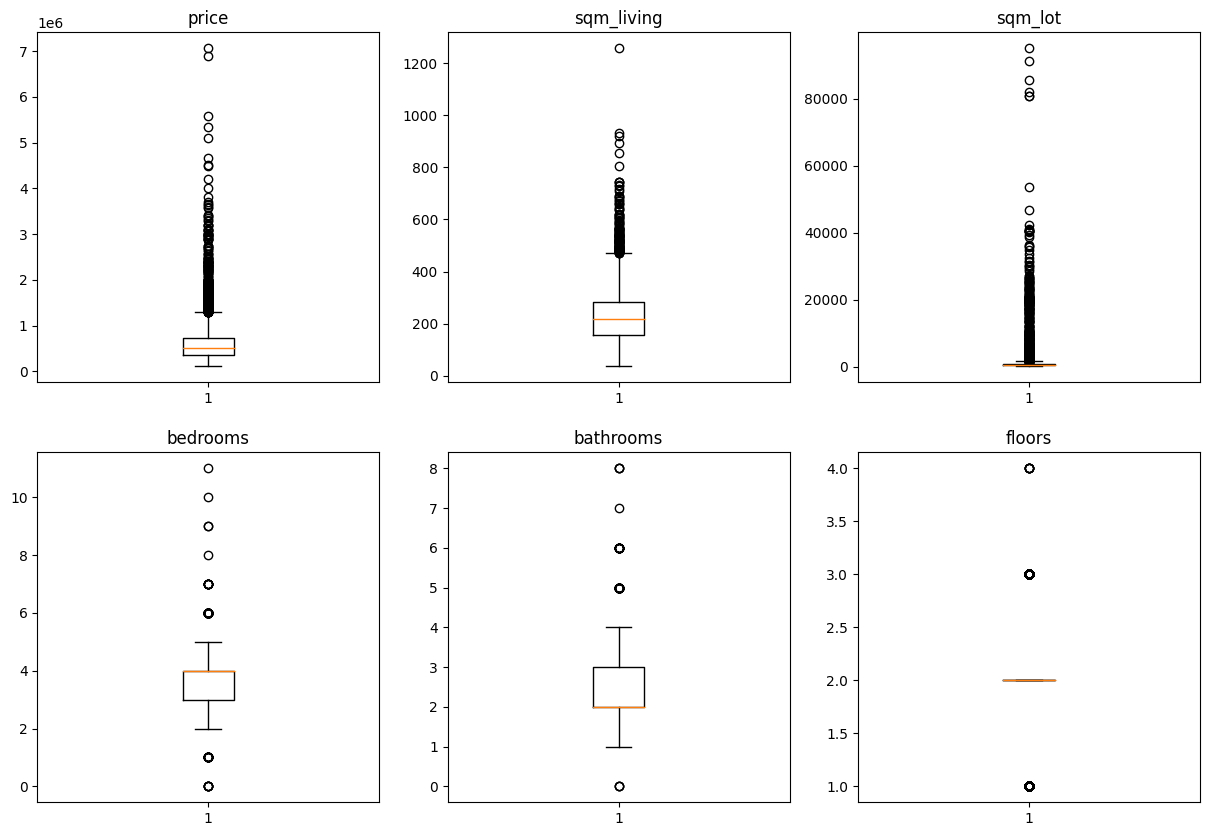

In [3234]:
# Boxplot - utilizado para visualização de outliers

fig, axs = plt.subplots(2,3,figsize=(15,10))

axs[0,0].set_title('price')
axs[0,0].boxplot(df2.price)

axs[0,1].set_title('sqm_living')
axs[0,1].boxplot(df2.sqm_living)

axs[0,2].set_title('sqm_lot')
axs[0,2].boxplot(df2.sqm_lot)

axs[1,0].set_title('bedrooms')
axs[1,0].boxplot(df2.bedrooms)

axs[1,1].set_title('bathrooms')
axs[1,1].boxplot(df2.bathrooms)

axs[1,2].set_title('floors')
axs[1,2].boxplot(df2.floors)

plt.show()

In [3235]:
# Eliminando imóveis que tivessem a quantidade de quartos ou banheiros igual a zero

df2 = df2[df2['bedrooms'] > 0]
df2 = df2[df2['bathrooms'] > 0]

In [3236]:
# Criando uma lista com colunas quantitativas, para serem analisadas no método interquartil

quanti = ['id', 'price', 'sqm_living', 'sqm_lot', 'bedrooms', 'bathrooms', 'floors']

# Criando um df2 com as variáveis quantitativas

df2_quanti = df2[quanti]

# Todos os pontos que estão fora do limite superior e inferior da amostra serão considerados outliers
    # Limite superior = Q3 + 1,5 * Distancia Interquartil
    # Limite inferior = Q1 - 1,5 * Distancia Interquartil

# Distância Interquartil = Valor do 3º Quartil - Valor do 1º Quartil (Q3 - Q1)

colunas = df2_quanti.columns
outliers = []

for c in df2_quanti.columns:
    # Definindo os valores do limite superior e limite inferior de cada variável 
    q3 = np.quantile(df2_quanti[c], 0.75)
    q1 = np.quantile(df2_quanti[c], 0.25)
    dist = q3 - q1 
    lim_inf = q1 - 1.5*dist
    lim_sup = q3 + 1.5*dist
    
    print(f'Variável: {c}')
    print(f'Distância Interquartil: {dist}')
    print(f'Limite Inferior: {lim_inf}')
    print(f'Limite Superior: {lim_sup}\n')

    outlier_count = 0

    for i in df2_quanti.index:
        if df2_quanti[c][i] < lim_inf:
            outlier_count += 1
        elif df2_quanti[c][i] > lim_sup:
            outlier_count += 1
        else: 
            pass
        
    outliers.append(outlier_count)
    
df_outlier = pd.DataFrame()
df_outlier['Variável'] = colunas
df_outlier['Outliers'] = outliers
df_outlier['Porcentagem'] = (outliers/df2_quanti.id.count()) * 100


Variável: id
Distância Interquartil: 5486199817.0
Limite Inferior: -6031699337.5
Limite Superior: 15913099930.5

Variável: price
Distância Interquartil: 372000.0
Limite Inferior: -190000.0
Limite Superior: 1298000.0

Variável: sqm_living
Distância Interquartil: 125.41910399999998
Limite Inferior: -31.12251839999996
Limite Superior: 470.55389759999997

Variável: sqm_lot
Distância Interquartil: 478.91517120000003
Limite Inferior: -383.9218128
Limite Superior: 1531.7388720000001

Variável: bedrooms
Distância Interquartil: 1.0
Limite Inferior: 1.5
Limite Superior: 5.5

Variável: bathrooms
Distância Interquartil: 1.0
Limite Inferior: 0.5
Limite Superior: 4.5

Variável: floors
Distância Interquartil: 0.0
Limite Inferior: 2.0
Limite Superior: 2.0



In [3237]:
# Verificando a quantidade de outliers em cada variável, para entender como tratá-las

df_outlier

# Como as variáveis, 'sqm_living', 'bedrooms' e 'bathrooms', são variáveis que possuem pouca porcentagem de outliers em relação à quantidade de dados do dataframe, 
    # essas outliers serão removidas.

# Por mais que a variável 'price' tenha uma relação de outliers baixa, elas não serão exlcuidas, pois há vários fatores que podem alterar seu valor, 
    # não nos dando a certeza de que realmente são outliers. 

# Já as variáveis 'sqm_lot' e 'floors', possuem uma relação maior de outilers.

# Ao verificar manualmente, é possível concluir que a variável 'floor', tem como valor máximo: 4 andares, e como valor mínimo: 1 andar.
    # Então, não serão consideradas outliers e, consequentemente, não serão excluídas do dataframe.

# Verificando a variável 'sqm_lot', possui como valor máximo: 95.139 m², o que é mais de 10x maior que um campo de futebol, considerando que um campo de futebol têm, em média, 8.250 m².
    # Sendo assim, tais outliers, terão de ser excluídas, pois se tornam mais prejudiciais à análise se mantidas do dataset.

# Conclusão: serão excluídas as outliers nas variáveis: 'sqm_living', 'sqm_lot', 'bedrooms' e 'bathrooms'.

,Variável,Outliers,Porcentagem
0,id,0,0.000000
1,price,410,6.014376
2,sqm_living,133,1.951005
3,sqm_lot,745,10.928561
4,bedrooms,97,1.422913
5,bathrooms,63,0.924160
6,floors,1338,19.627402


In [3238]:
df2.describe()

,index,id,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,...,sqm_living,sqm_lot,sqm_above,sqm_basement,sqm_living15,sqm_lot15,profit,percent_profit,latest_year,age
count,6817.000000,6.817000e+03,6.817000e+03,6817.000000,6817.000000,6817.000000,6817.000000,6817.000000,6817.000000,6817.000000,...,6817.000000,6817.000000,6817.000000,6817.000000,6817.000000,6817.000000,6817.000000,6817.000000,6817.000000,6817.000000
mean,12892.626522,4.720821e+09,6.283319e+05,3.513862,2.455039,1.976823,0.006161,0.214317,3.030512,8.310547,...,229.572897,1360.630790,211.580084,17.992813,207.629109,1144.076966,281.588382,0.084472,2004.389321,18.610679
std,6879.217261,2.961721e+09,4.390062e+05,0.853821,0.792096,0.445428,0.078256,0.739350,0.188292,1.141897,...,95.962500,4378.993984,86.432986,37.504796,72.241070,3130.345385,5950.438983,1.951450,6.037208,6.037208
min,5.000000,3.600057e+06,1.100000e+05,1.000000,1.000000,1.000000,0.000000,0.000000,3.000000,5.000000,...,51.096672,53.140539,51.096672,0.000000,64.103098,60.479879,-40000.000000,-5.405405,1993.000000,8.000000
25%,6780.000000,2.197600e+09,3.680000e+05,3.000000,2.000000,2.000000,0.000000,0.000000,3.000000,8.000000,...,157.006138,334.450944,144.928742,0.000000,150.502925,362.321856,0.000000,0.000000,2000.000000,15.000000
50%,13740.000000,4.008400e+09,5.100000e+05,4.000000,2.000000,2.000000,0.000000,0.000000,3.000000,8.000000,...,216.464083,532.613128,203.457658,0.000000,196.954445,536.236347,0.000000,0.000000,2005.000000,18.000000
75%,19881.000000,7.683800e+09,7.400000e+05,4.000000,3.000000,2.000000,0.000000,0.000000,3.000000,9.000000,...,282.425242,813.366115,262.915603,16.722547,252.696269,801.381623,0.000000,0.000000,2008.000000,23.000000
max,21612.000000,9.895000e+09,7.062500e+06,11.000000,8.000000,4.000000,1.000000,4.000000,5.000000,13.000000,...,1257.907162,95139.030367,874.217606,447.792653,576.927878,80937.128448,220000.000000,80.055402,2015.000000,30.000000


In [3239]:
# Criando funções para exclusão de outliers nas colunas escolhidas:

def limits(df, coluna): # Essa função define o limite inferior e superior de cada variável
    q3 = np.quantile(df[coluna], 0.75)
    q1 = np.quantile(df[coluna], 0.25)
    dist = q3 - q1 
    lim_inf = q1 - 1.5*dist
    lim_sup = q3 + 1.5*dist
    print(f'Limite Inferior: {lim_inf}')
    print(f'Limite Superior: {lim_sup}\n')

    return lim_inf, lim_sup


def drop_outliers(df, coluna): # Essa função detecta os valores fora dos limites e os excluem do dataframe
    print(f'Quantidade de linhas do dataframe: {len(df)}')
    acima_lim_sup = df[df[coluna] > lim_sup].index
    abaixo_lim_inf = df[df[coluna] < lim_inf].index
    print(f'Quantidade de outliers na coluna {coluna}: {len(acima_lim_sup) + len(abaixo_lim_inf)}')
    df.drop(acima_lim_sup, axis=0, inplace=True)
    df.drop(abaixo_lim_inf, axis=0, inplace=True)

    return print(f'Quantidade de linhas do dataframe pós exclusão de outliers: {len(df)}\n')


del_outliers = ['sqm_living', 'sqm_lot', 'bedrooms', 'bathrooms']

for variavel in del_outliers: # Loop utilizando as funções acima para realizar a exclusão das outliers
    lim_inf, lim_sup = limits(df2, variavel)
    drop_outliers(df2, variavel)

Limite Inferior: -31.12251839999996
Limite Superior: 470.55389759999997

Quantidade de linhas do dataframe: 6817
Quantidade de outliers na coluna sqm_living: 133
Quantidade de linhas do dataframe pós exclusão de outliers: 6684

Limite Inferior: -353.2173580799998
Limite Superior: 1476.0434995199998

Quantidade de linhas do dataframe: 6684
Quantidade de outliers na coluna sqm_lot: 688
Quantidade de linhas do dataframe pós exclusão de outliers: 5996

Limite Inferior: 1.5
Limite Superior: 5.5

Quantidade de linhas do dataframe: 5996
Quantidade de outliers na coluna bedrooms: 64
Quantidade de linhas do dataframe pós exclusão de outliers: 5932

Limite Inferior: 0.5
Limite Superior: 4.5

Quantidade de linhas do dataframe: 5932
Quantidade de outliers na coluna bathrooms: 7
Quantidade de linhas do dataframe pós exclusão de outliers: 5925



## Localizando as Cidades de cada imóvel

In [3240]:
# Utilizando a biblioteca pyzipcode, para identificação das cidades de cada imóvel, por meio do zipcode

zcdb = ZipCodeDatabase()
city = []

for zipcode in df2['zipcode']:
    try:
        zc = zcdb[zipcode]
        city.append(zc.city)
    except KeyError:
        if zipcode == 98077:
            city.append(str('Woodinville'))
        else:
            city.append(str('nan'))

df2['city'] = city
df2

,index,id,date,price,bedrooms,bathrooms,floors,waterfront,view,condition,...,sqm_lot,sqm_above,sqm_basement,sqm_living15,sqm_lot15,profit,percent_profit,latest_year,age,city
1,6,1321400060,2014-06-27,257500.0,3,2.0,2.0,0,0,3,...,633.505830,159.328714,0.0,207.917004,633.505830,0,0.0,1995,28,Federal Way
2,9,3793500160,2015-03-12,323000.0,3,2.0,2.0,0,0,3,...,609.443942,175.586746,0.0,222.038266,703.276013,0,0.0,2003,20,Maple Valley
3,16,1875500060,2014-07-31,395000.0,3,2.0,2.0,0,0,3,...,1304.358682,175.586746,0.0,175.586746,1302.314815,0,0.0,1994,29,Duvall
4,22,7137970340,2014-07-03,285000.0,5,2.0,2.0,0,0,3,...,585.289152,210.889901,0.0,208.102810,650.785795,0,0.0,1995,28,Auburn
5,29,1873100390,2015-03-02,719000.0,4,2.0,2.0,0,0,3,...,666.393506,238.760813,0.0,244.334995,559.833719,0,0.0,2005,18,Redmond
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6819,21608,263000018,2014-05-21,360000.0,3,2.0,3.0,0,0,3,...,105.073338,142.141651,0.0,142.141651,140.190687,0,0.0,2009,14,Seattle
6820,21609,6600060120,2015-02-23,400000.0,4,2.0,2.0,0,0,3,...,540.045372,214.606022,0.0,170.012563,668.901888,0,0.0,2014,9,Seattle
6821,21610,1523300141,2014-06-23,402101.0,2,1.0,2.0,0,0,3,...,125.419104,94.761101,0.0,94.761101,186.456401,0,0.0,2009,14,Seattle
6822,21611,291310100,2015-01-16,400000.0,3,2.0,2.0,0,0,3,...,221.852460,148.644864,0.0,130.993286,119.566212,0,0.0,2004,19,Issaquah


In [3241]:
# Verificando se há algum dado nulo na nova coluna 'city'
df2.city.isna().sum()

0

In [3242]:
# Após algumas pesquisas, pode-se concluir que, algumas das melhores cidades para se viver, no Condado de King, são:
    # Bellevue;
    # Kirkland;
    # Redmond;
    # Sammamish;
    # Mercer Island;

# As métricas usadas para chegar nessa conclusão foram: IDH (Índice de Desenvolvimento Humano), taxa de desemprego, média salarial,
    # custo e qualidade de vida, educação, índice de criminalidade.

# Criando um dataframe com imóveis das 5 cidades selecionadas:

best_cities = ['Bellevue', 'Kirkland', 'Redmond', 'Sammamish', 'Mercer Island']

df_five = df2.groupby('city').filter(lambda x: x['city'].iloc[0] in best_cities).reset_index()
df_five.drop(['index', 'level_0'], axis=1, inplace=True)

df_five['sqm_price'] = df_five['price'] / df_five['sqm_living']

df_five_mean = df_five.groupby('city').mean().reset_index()
df_five_mean

# Ao compararmos com df gerado pela função 'highest_profits.describe()', o qual já foi analisado anteriormente, podemos ver quais características (em média) de cada cidade são semelhantes 
    # as características dos imóveis que tiveram maiores lucros em suas vendas. Por exemplo: 

# Em 'price', a média dos imóveis com maiores lucros, é de $684.450,00. Entretanto, analisando agora por cidade, a média de preço mais próxima é da cidade de Redmond, 
    # com preço médio de $670.241,00, seguido pela cidade de Sammamish, com preço médio de $793.104,00.

# Em 'sqm_living', a média dos imóveis com maiores lucros, é de 155m². Já neste caso, podemos ver que a menor das áreas médias, é de Redmond, com 232m².

# Com estas informações, podemos comparar o valor médio por m² em cada cidade ($/m²) com o valor médio por m² dos imóveis que tiveram mais lucro.
    # Onde, os imóveis com mais lucro, têm uma média de $4.415,00/m². Já a cidade com valor mais baixo, é Sammamish, com uma média de $2.700,00/m². E a cidade com valor mais alto é
    # Mercer Island, custando $4.600,00/m², em média.
    # Assim, podemos chegar a conclusão de que os imóveis nas 5 cidades escolhidas, possuem um ótimo custo-benefício, por serem, geralmente, maiores em área, e terem um ótimo valor por m²,
    # os quais variam entre $2.700,00/m² (em torno de 60% a menos, do que a média dos imóveis com mais lucro) e $4.600,00/m² (em torno de 4.5% a mais).
    # Lembrando que neste caso, está sendo considerado o 'sqm_living' para realização dos cálculos, então se trata do Valor Médio da Área Habitável.

# Os imóveis com mais lucros têm, em média: 3 quartos, 2 banheiros, e 1 andar. Já os imóveis dentre as 5 cidades selecionadas, possuem em média, 4 quartos, 3 banheiros e 2 andares. 
    # O que reforça a questão do custo-beneficio dos imóveis.

# Em ambas situações, geralmente, os imóveis não são à beira-mar, e nem possuem uma bela vista.

# O ano médio de construção dos imóveis com mais lucro, é 1944. Já os imóveis das cidades selecionadas, foram construídos ou reformados há, no máximo, 30 anos. 
# O que mostra que são imóveis mais modernos, dentro das novas leis de construções civís, o que pode torná-los mais seguros.

# As notas médias relacionas às condições dos imóveis, são: 2.5 para os selecionados pelo maior lucro, e 3 para os imóveis dentre as 5 cidades, ou seja, 
# os imóveis pelas cidades selecionadas, geralmente, estão em uma condição levemente melhor.

# Sobre a variável 'grade', a primeira análise, nos mostra que os imóveis selecionados pelo lucro, tem uma nota média de 6.7 (onde a maior nota é 13), o que torna uma nota intermediária. 
# Já entre os outros imóveis, a cidade com menor nota média é Redmond, com 8.2, e a cidade com maior nota média é Mercer Island, com 9.5. Ou seja, nos imóveis selecionados por cidade,
# foram usados melhores materiais de construção, consequentemente, tornando tais imóveis mais seguros e com maior durabilidade.

C:\Users\Lucas\AppData\Local\Temp\ipykernel_27412\574522461.py:20: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,city,id,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,...,sqm_lot,sqm_above,sqm_basement,sqm_living15,sqm_lot15,profit,percent_profit,latest_year,age,sqm_price
0,Bellevue,4.380320e+09,1.171472e+06,3.850267,2.914439,1.855615,0.016043,0.422460,3.037433,9.401070,...,826.598588,266.656565,32.466383,256.159515,876.985322,1256.684492,0.168560,2003.352941,19.647059,3879.887399
1,Kirkland,3.466550e+09,9.197328e+05,3.763033,2.649289,1.914692,0.004739,0.255924,3.066351,8.957346,...,693.787574,245.918310,23.867716,227.420478,739.007138,-71.090047,-0.009203,2003.995261,19.004739,3400.570352
2,Mercer Island,3.698743e+09,1.480144e+06,4.031250,3.312500,1.875000,0.031250,0.656250,3.062500,9.562500,...,1020.214734,292.876834,29.090264,247.557569,1073.604950,0.000000,0.000000,2004.625000,18.375000,4568.248081
3,Redmond,6.789674e+09,6.702417e+05,3.298734,2.344304,1.784810,0.000000,0.048101,3.002532,8.275949,...,559.837482,227.193091,5.294297,226.957658,534.361822,-50.886076,-0.011834,2005.597468,17.402532,2962.251898
4,Sammamish,5.006517e+09,7.931041e+05,3.919075,2.630058,1.988439,0.023121,0.176301,3.014451,9.164740,...,728.616525,281.967171,5.711120,282.227084,754.772759,1271.676301,0.242224,2003.213873,19.786127,2786.419160


## Analisando Variáveis

In [3243]:
# Preço Médio x Cidade

fig = px.bar(df_five_mean, x='city', y='price', title='Preço médio dos imóveis em cada cidade', labels={'city': 'Cidades', 'price': 'Preço médio dos imóveis ($)'}, width=1200, height=600)

fig.update_layout(title={'text': 'Preço médio dos imóveis em cada cidade', 'x': 0.5, 'y': 0.9})

fig.show()

# Podemos verificar que a cidade com os imóveis mais caros é Mercer Island, e a cidade com imóveis mais baratos é Redmond.
    # O preço médio de Redmond é menor que a metade do preço médio dos imóveis de Mercer Island.


In [3244]:
# Valor médio do m² x Cidade 

fig = px.bar(df_five_mean, x='city', y='sqm_price', title='Preço médio dos imóveis em cada cidade', labels={'sqm_price': 'Preço Médio por Área Habitável ($/m²)', 'city': 'Cidades'}, width=1200, height=600)

fig.update_layout(title={'text': 'Valor médio por m² habitável em cada cidade', 'x': 0.5, 'y': 0.9})

fig.show()

# Mercer Island possui o maior valor médio por m² habitável.
# Sammamish possui o menor valor médio por m² haitável, mesmo sendo muito próximo ao valor de Redmond.

In [3245]:
# Quantidade de Quartos e Banheiros x Preço x Área

fig = px.scatter(
                df_five, x = 'bedrooms', y = 'price', color ='bathrooms', size='sqm_living',
                title = 'Relação entre o preço, área, quantidade de quartos e banheiros dos imóveis',
                labels={'bedrooms': 'Quantidade de Quartos', 'price': 'Preço dos Imóveis ($)', 'bathrooms':'Quantidade de Banheiros', 'sqm_living':'Área do Imóvel (m²)' },
                width=1200, height=600
)

fig.update_layout(title={'text': 'Relação entre preço, área, e quantidade de quartos e banheiros dos imóveis', 'x': 0.7, 'y': 0.9})

fig.show()

# Quanto mais caro for o imóvel, maior sua área, assim como, a quantidade de quartos e banheiros.

In [3246]:
# Condição x Qualidade do Material de construção x Preço

fig = px.scatter(
                df_five, x = 'condition', y = 'price', color ='grade',
                title = 'Relação entre o preço, área, quantidade de quartos e banheiros dos imóveis',
                labels={'condition': 'Nota da Condição do Imóvel', 'price': 'Preço dos Imóveis ($)', 'grade':'Qualidade dos Materiais de Construção'},
                width=1200, height=600
)

fig.update_layout(title={'text': 'Relação entre preço, qualidade dos materiais e o condição do imóvel', 'x': 0.4, 'y': 0.9})

fig.show()

# Com o gráfico abaixo, é posivel concluir que:
    # A condição do imóvel, não é um fator que pode alterar o preço do mesmo de maneira significativa.
    # A qualidade dos materiais de construção utilizados, tem uma grande influência no preço do imóvel.


In [3247]:
# Vista do imóvel x Preço

fig = px.scatter(
                df_five, x = 'view', y = 'price', color ='waterfront',
                title = 'Influência da vista sobre o preço do imóvel',
                labels={'view': 'Nota sobre o quão bela é a vista', 'price': 'Preço dos Imóveis ($)', 'waterfront':'Beira-mar'},
                width=1200, height=600
)

fig.update_layout(title={'text': 'Influência da vista sobre o preço do imóvel', 'x': 0.5, 'y': 0.9})

fig.show()

# A nota sobre à vista do imóvel, e se o mesmo é ou não a beira-mar, não tem influência sobre o preço.
# O fato do imóvel ser ou não a beira-mar, tem grande influência sobre a nota de quão bela é a vista do imóvel.

C:\Users\Lucas\AppData\Local\Temp\ipykernel_27412\462057291.py:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: >

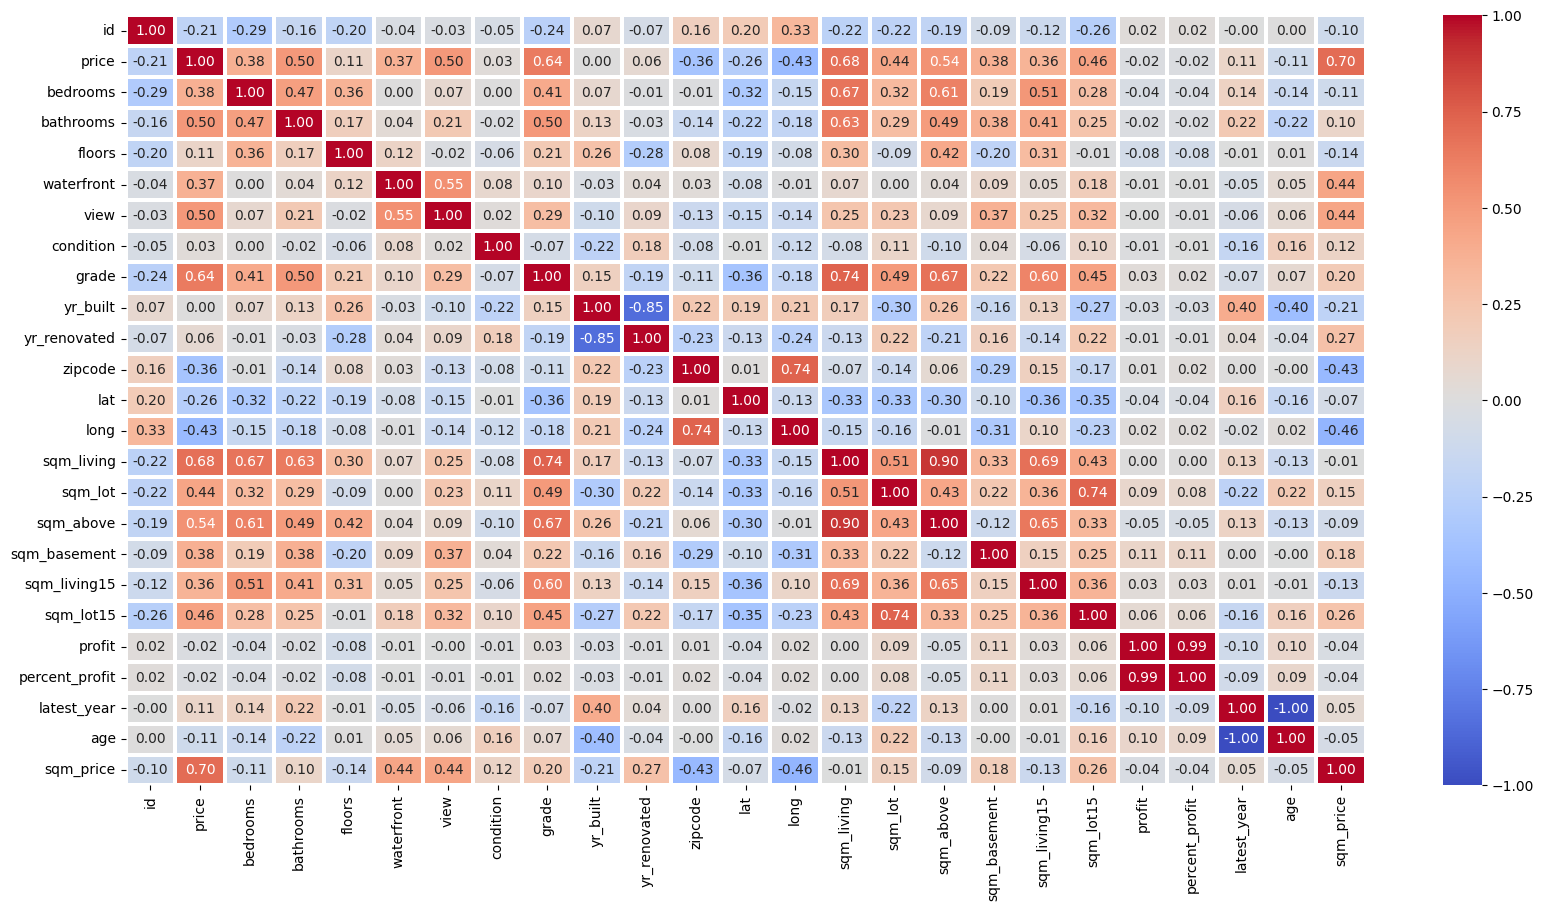

In [3248]:
# Verificando a correlação entre as variáveis

plt.figure(figsize=(20,10))
sns.heatmap(df_five.corr(), annot = True, linewidths=1.5 , fmt = '.2f', cmap='coolwarm')

# Analisando o heatmap, é possível concluir que as 3 variáveis que mais se correlacionam com a a variável 'price', são:
    # sqm_living: 0.68
    # grade: 0.64
    # sqm_above: 0.54

## Verificando os melhores imóveis para investimento

In [3249]:
# As informações extraídas na análise do dataframe 'highest_profits' (10 imóveis com maior lucro em suas vendas passadas), são tratadas como boas características para a valorização de um imóvel,
    # pois todas as vendas de tais imóveis, obtiveram um alto lucro (onde o menor lucro registrado é de 67.5%, e o maior lucro de 321.8%). Sendo assim, serão usadas como métricas de avaliação.

# As características médias, encontradas na análise do dataframe 'df_five' (imóveis das 5 melhores cidades para se viver, no Condado de King), foram tomadas como métricas para verificar quais imóveis
    # se destacam diante de todos os outros das cidades escolhidas.

# Por as variáveis 'sqm_living', 'grade', 'sqm_above' e 'bathrooms', serem as que mais se correlacionam com a variável 'price', elas terão maior peso na hora da escolha dos imóveis.

# Imóveis com boas características, e alguma(s) característica(s) fora da média, de maneira positiva, se destacam diante de outros. Por exemplo: um imóvel possui todas as características dentro da média, 
    # exceto por: 'price', que está abaixo da média, e 'waterfront' que está com valor '1' ao invés de '0', é considerado um ótimo imóvel. Pois têm todas as boas características para uma boa valorização ao 
    # longo do tempo, está em um bom preço para compra, e tem o diferencial de ser beira-mar (waterfront = 1), o que aumenta ainda mais seu potencial de valorização, e consequentemente, pode originar altos
    # lucros em sua venda no futuro.

In [3250]:
# Dropando colunas que não serão utilizadas para definir os imóveis como bom investimento

df_five.drop(['latest_year','age','yr_built','yr_renovated', 'zipcode', 'date', 'profit', 'floors', 'percent_profit'], axis=1, inplace=True)


In [3251]:
# Verificando as características médias dos imóveis dentre as 5 cidades selecionadas, as quais também serão utilizadas como métricas

df_five.describe()

,id,price,bedrooms,bathrooms,waterfront,view,condition,grade,lat,long,sqm_living,sqm_lot,sqm_above,sqm_basement,sqm_living15,sqm_lot15,sqm_price
count,1.171000e+03,1.171000e+03,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000
mean,5.194789e+09,8.536747e+05,3.673783,2.601196,0.011102,0.199829,3.024765,8.876174,47.645589,-122.097255,268.602047,689.024004,254.848430,13.753617,248.597983,705.812480,3179.704317
std,3.079005e+09,3.948239e+05,0.824510,0.804240,0.104823,0.723973,0.166106,1.070604,0.054223,0.078262,78.182497,281.959006,74.326263,35.104286,67.338608,313.813310,911.644147
min,1.120007e+07,2.650000e+05,2.000000,1.000000,0.000000,0.000000,3.000000,6.000000,47.530900,-122.260000,98.477222,72.928886,78.967584,0.000000,105.909466,107.767526,1733.556099
25%,2.421360e+09,6.387500e+05,3.000000,2.000000,0.000000,0.000000,3.000000,8.000000,47.595050,-122.172000,213.212477,472.783571,199.741536,0.000000,196.954445,483.095808,2621.254133
50%,5.556300e+09,7.700000e+05,4.000000,2.000000,0.000000,0.000000,3.000000,9.000000,47.655300,-122.095000,272.205907,658.589651,259.199482,0.000000,248.980147,664.535445,2932.078971
75%,8.361150e+09,9.200000e+05,4.000000,3.000000,0.000000,0.000000,3.000000,10.000000,47.694950,-122.026000,324.231610,870.222776,307.509062,0.000000,297.289728,880.720819,3403.497497
max,9.808100e+09,3.650000e+06,5.000000,4.000000,1.000000,4.000000,5.000000,12.000000,47.733000,-121.964000,469.160352,1474.835760,464.515200,208.102810,537.908602,3549.918061,8611.128333


In [3252]:
# Filtrando o df 'df_five', por cidade, para selecionar o melhores imóveis de cada
df_bellevue = df_five[df_five['city']=='Bellevue'].sort_values('sqm_price', ascending=True)
df_bellevue = df_bellevue[df_bellevue['price']<925000] # Considerando que o maior preço no df 'highest_profits' é de, aproximadamente, $925.00,00, as buscas dos imóveis serão limitadas a tal preço.
df_bellevue.head(20)

# Os melhores da cidade de Bellevue, são:
    # ID: 2205700470 / Index: 818  
        #  - 'price' = $650.500,00: Ótimo preço para compra, sendo abaixo dos preços médios encontrados nas análises de 'highest_profits' e'df_five'. Ou seja, com preço melhor do que os imóveis que mais obtiveram lucro,
        #  e também, melhor do que o preço médio dos imóveis das 5 cidades selecionadas. 
        #  - 'bedrooms' e 'bathrooms' = 5 e 4: Mais quartos e banheiros do que as médias encontradas nas análises dos dois dataframes.
        #  - 'floors' = 2: Mais andares que a média encontrada no df 'highest_profits', e a mesmo valor encontrado no df 'df_five'.
        #  - 'grade' = 7: Nota considerada boa, acima da média encontrada no df 'highest_profits', porém, menor do que a média no df 'df_five'.
        #  - 'sqm_living' = 364m²: Maior do que as médias encontradas nas análises de 'highest_profits' e'df_five'.
        #  - 'sqm_living15' = 130m²: Ou seja, o imóvel é maior do que os 15 imóveis mais próximos a ele.
        #  - 'sqm_price' = $1786.20/m²: Valor por m² hábitável muito abaixo dos valores médios de 'highest_profits' e'df_five'.
    
    # ID: 3343301490 / Index: 645
        #  - 'price' = $818.500,00: Bom preço para compra, sendo abaixo do preço médio encontrado em 'df_five', porém, um pouco acima do preço encontrado em 'highest_profits'. 
        #  (Mas por suas características serem acima da média das encontradas no df 'highest_profits', acaba se tornando um preço bom)
        #  - 'bedrooms' e 'bathrooms' = 5 e 4: Mais quartos e banheiros do que as médias utilizadas como métricas.
        #  - 'floors' = 2: Mais andares que a média em 'highest_profits', e a mesmo valor encontrado em 'df_five'.
        #  - 'view' = 1: Baixa pontuação, porém, acima da média de 'highest_profits' e'df_five', tornando-o um diferencial.
        #  - 'grade' = 9: Nota considerada ótima, acima das médias de 'highest_profits' e'df_five'.
        #  - 'sqm_living' = 445m²: Maior do que as médias de 'highest_profits' e'df_five'.
        #  - 'sqm_living15' = 243m²: Ou seja, o imóvel é maior do que os 15 imóveis mais próximos a ele.
        #  - 'sqm_price' = $1839.30/m²: Valor por m² hábitável muito abaixo dos valores médios de 'highest_profits' e'df_five'.

,id,price,bedrooms,bathrooms,waterfront,view,condition,grade,lat,long,sqm_living,sqm_lot,sqm_above,sqm_basement,sqm_living15,sqm_lot15,city,sqm_price
818,2205700470,650500.0,5,4.0,0,0,3,7,47.5766,-122.151,364.179917,1060.209492,364.179917,0.000000,130.064256,905.804640,Bellevue,1786.205032
645,3343301490,818500.0,5,4.0,0,1,3,9,47.5469,-122.194,445.005562,1203.744689,288.928454,156.077107,243.405965,1257.721356,Bellevue,1839.302855
916,3343301343,880000.0,5,4.0,0,0,3,10,47.5491,-122.190,427.353984,814.202243,295.431667,131.922317,298.218758,876.168570,Bellevue,2059.182862
367,8965450190,295000.0,3,2.0,0,0,3,7,47.5605,-122.117,139.354560,284.283302,139.354560,0.000000,250.838208,718.512111,Bellevue,2116.902382
229,6918700130,749000.0,3,2.0,0,0,3,8,47.6276,-122.122,314.012275,662.027063,314.012275,0.000000,168.154502,678.935416,Bellevue,2385.257072
697,1424059142,799000.0,4,4.0,0,0,3,9,47.5613,-122.126,325.160640,794.042283,232.257600,92.903040,218.322144,954.114221,Bellevue,2457.246978
1132,9293000170,800000.0,5,2.0,0,0,3,9,47.5459,-122.184,316.799366,439.059767,316.799366,0.000000,261.057542,476.499692,Bellevue,2525.257576
570,3260590070,744000.0,4,2.0,0,0,3,8,47.5664,-122.124,291.715546,674.476070,204.386688,87.328858,265.702694,760.504285,Bellevue,2550.429729
500,4139700260,795000.0,5,4.0,0,0,3,9,47.5567,-122.124,309.367123,344.205763,242.476934,66.890189,261.057542,368.917972,Bellevue,2569.762397
852,4139660040,760000.0,5,4.0,0,0,5,10,47.5501,-122.128,295.431667,1300.642560,295.431667,0.000000,340.954157,1342.448928,Bellevue,2572.506892


In [3253]:
df_kirk = df_five[df_five['city']=='Kirkland'].sort_values('sqm_price', ascending=True)
df_kirk = df_kirk[df_kirk['price']<925000]
df_kirk.head(20)

# Os melhores da cidade de Kirkland, são:
    # ID: 3127200021 / Index: 908  
    # ID: 9194102188 / Index: 786
    # ID: 1926059236 / Index: 1037


,id,price,bedrooms,bathrooms,waterfront,view,condition,grade,lat,long,sqm_living,sqm_lot,sqm_above,sqm_basement,sqm_living15,sqm_lot15,city,sqm_price
640,11300120,635000.0,3,2.0,0,0,3,8,47.7277,-122.207,311.225184,372.262481,236.902752,74.322432,217.393114,387.126968,Kirkland,2040.323318
544,4099100260,589000.0,3,2.0,0,0,3,9,47.6681,-122.184,273.134938,445.841689,158.864198,114.270739,235.973722,428.840433,Kirkland,2156.443277
908,3127200021,850000.0,4,4.0,0,0,3,10,47.7059,-122.200,384.618586,658.589651,293.573606,91.044979,245.264026,826.465444,Kirkland,2209.981607
843,3840700757,585000.0,4,2.0,0,0,3,8,47.7134,-122.237,263.844634,1026.021174,263.844634,0.000000,179.674479,892.333699,Kirkland,2217.213941
293,8663310050,510000.0,4,2.0,0,0,3,7,47.7250,-122.172,226.683418,968.328386,226.683418,0.000000,184.877050,720.741784,Kirkland,2249.833735
650,866400040,540000.0,5,3.0,0,0,3,8,47.7271,-122.228,238.760813,519.327994,146.786803,91.974010,187.664141,975.481920,Kirkland,2261.677675
786,9194102188,675000.0,4,4.0,0,2,3,8,47.7082,-122.221,296.360698,638.708400,196.954445,99.406253,236.902752,638.708400,Kirkland,2277.629947
1037,1926059236,799950.0,5,4.0,0,0,3,9,47.7202,-122.223,349.315430,436.830094,258.270451,91.044979,274.063968,555.653082,Kirkland,2290.050569
688,2621730220,740000.0,4,2.0,0,0,3,10,47.7230,-122.158,318.657427,943.616177,318.657427,0.000000,323.302579,943.616177,Kirkland,2322.243064
556,7491010060,730000.0,4,4.0,0,0,3,10,47.7196,-122.223,313.083245,523.787340,209.031840,104.051405,286.141363,668.901888,Kirkland,2331.648251


In [3254]:
df_red = df_five[df_five['city']=='Redmond'].sort_values('sqm_price', ascending=True)
df_red = df_red[df_red['price']<925000]
df_red.head(20)

# Os melhores da cidade de Redmond, são:
    # ID: 6891100090 / Index: 1157  
    # ID: 7205930050 / Index: 326

,id,price,bedrooms,bathrooms,waterfront,view,condition,grade,lat,long,sqm_living,sqm_lot,sqm_above,sqm_basement,sqm_living15,sqm_lot15,city,sqm_price
206,7202331500,673200.0,5,3.0,0,0,3,7,47.6833,-122.040,388.334707,795.342925,388.334707,0.000000,318.192912,612.323937,Redmond,1733.556099
380,7202340590,702000.0,4,3.0,0,0,3,7,47.6777,-122.035,360.463795,1395.868176,360.463795,0.000000,243.405965,492.386112,Redmond,1947.491008
186,7202340930,634800.0,4,3.0,0,0,3,7,47.6802,-122.033,304.721971,455.596508,304.721971,0.000000,241.547904,464.886812,Redmond,2083.210467
1098,7203140360,359782.0,3,2.0,0,0,3,7,47.6871,-122.014,171.870624,315.870336,171.870624,0.000000,171.870624,315.870336,Redmond,2093.330388
1157,6891100090,850000.0,5,4.0,0,0,3,9,47.7077,-122.120,390.192768,501.676416,291.715546,98.477222,306.580032,516.912515,Redmond,2178.410441
1169,7202300110,810000.0,4,3.0,0,0,3,9,47.6857,-122.046,370.683130,728.174028,370.683130,0.000000,313.083245,633.041315,Redmond,2185.154746
904,7202290650,620000.0,4,2.0,0,0,3,7,47.6884,-122.044,282.425242,892.426602,282.425242,0.000000,157.006138,357.583801,Redmond,2195.271203
299,7202340010,671300.0,4,2.0,0,0,3,7,47.6798,-122.033,304.721971,486.068705,304.721971,0.000000,241.547904,471.947443,Redmond,2202.991787
748,7202271060,610000.0,4,2.0,0,0,3,8,47.6872,-122.036,276.851059,547.756324,276.851059,0.000000,269.418816,530.662164,Redmond,2203.350790
543,7203101610,265000.0,2,1.0,0,0,3,7,47.6968,-122.025,119.844922,262.729797,119.844922,0.000000,119.844922,244.149189,Redmond,2211.190900


In [3255]:
df_sam = df_five[df_five['city']=='Sammamish'].sort_values('sqm_price', ascending=True)
df_sam = df_sam[df_sam['price']<925000]
df_sam.head(20)

# Os melhores da cidade de Sammamish, são:
    # ID: 8562900520 / Index: 125  
    # ID: 6127000480 / Index: 998

,id,price,bedrooms,bathrooms,waterfront,view,condition,grade,lat,long,sqm_living,sqm_lot,sqm_above,sqm_basement,sqm_living15,sqm_lot15,city,sqm_price
125,8562900520,640000.0,5,4.0,0,0,3,9,47.6108,-122.060,342.812218,1108.147461,235.973722,106.838496,245.264026,1108.147461,Sammamish,1866.911292
998,6127000480,720000.0,5,4.0,0,0,3,8,47.5910,-122.008,384.618586,709.965032,384.618586,0.000000,309.367123,645.954837,Sammamish,1871.984420
360,6127010670,627000.0,5,3.0,0,0,3,7,47.5933,-122.007,331.663853,503.998992,331.663853,0.000000,249.909178,496.752555,Sammamish,1890.468300
704,7504021310,525000.0,3,2.0,0,0,3,9,47.6359,-122.052,275.922029,1113.442934,164.438381,111.483648,277.780090,1119.388729,Sammamish,1902.711437
527,6127010890,663000.0,4,2.0,0,0,3,7,47.5927,-122.006,331.663853,580.272388,331.663853,0.000000,209.960870,485.975802,Sammamish,1999.011935
386,5411600210,810000.0,4,4.0,0,0,3,9,47.6136,-122.041,387.405677,401.526939,273.134938,114.270739,275.922029,457.268763,Sammamish,2090.831520
513,3295610200,770000.0,4,2.0,0,0,3,10,47.5658,-122.032,364.179917,1153.391242,364.179917,0.000000,338.074163,1189.623427,Sammamish,2114.339546
798,7559600430,640000.0,5,2.0,0,0,3,8,47.5957,-122.032,299.147789,442.125567,299.147789,0.000000,236.902752,442.125567,Sammamish,2139.410766
246,6705870080,600000.0,4,2.0,0,0,3,8,47.5773,-122.055,277.780090,475.849371,277.780090,0.000000,291.715546,731.611440,Sammamish,2159.982023
342,8635760480,473975.0,3,2.0,0,0,3,8,47.6022,-122.021,216.464083,335.379974,216.464083,0.000000,170.012563,273.878162,Sammamish,2189.624223


In [3256]:
df_merc = df_five[df_five['city']=='Mercer Island'].sort_values('sqm_price', ascending=True)
df_merc = df_merc[df_merc['price']<925000]
df_merc.head(20)

# Os melhores da cidade de Mercer Island, são:
    # ID: 1832100030 / Index: 85  

,id,price,bedrooms,bathrooms,waterfront,view,condition,grade,lat,long,sqm_living,sqm_lot,sqm_above,sqm_basement,sqm_living15,sqm_lot15,city,sqm_price
85,1832100030,597326.0,4,4.0,0,0,3,10,47.5784,-122.226,331.663853,766.450080,265.702694,65.961158,207.173779,929.030400,Mercer Island,1800.998194
43,1923000160,905000.0,4,4.0,0,0,3,9,47.5627,-122.215,275.922029,1345.793437,217.393114,58.528915,341.883187,1345.793437,Mercer Island,3279.912097
828,5315101728,770000.0,4,3.0,0,0,3,7,47.5893,-122.232,215.535053,668.901888,117.057830,98.477222,163.509350,668.901888,Mercer Island,3572.504750
864,5021900945,850000.0,3,2.0,0,0,3,9,47.5753,-122.222,229.470509,817.546752,229.470509,0.000000,217.393114,1020.075379,Mercer Island,3704.179698
479,1824059070,880000.0,4,2.0,0,0,3,8,47.5715,-122.225,217.393114,1003.352832,217.393114,0.000000,246.193056,1254.191040,Mercer Island,4047.966311
226,5021900050,832500.0,3,2.0,0,0,4,7,47.5777,-122.224,173.728685,885.087262,173.728685,0.000000,183.018989,1105.917788,Mercer Island,4791.954771
694,4458300190,875000.0,3,2.0,0,0,3,8,47.5800,-122.231,157.006138,984.029000,157.006138,0.000000,209.960870,923.920733,Mercer Island,5573.030541


In [3257]:
# Criando um dataframe contendo os 10 imóveis escolhidos

top_10 = [818, 645, 908, 786, 1037, 1157, 326, 125, 998, 85]
df_top10 = df_five.loc[top_10]
df_top10.sort_values('price', ascending=True)

,id,price,bedrooms,bathrooms,waterfront,view,condition,grade,lat,long,sqm_living,sqm_lot,sqm_above,sqm_basement,sqm_living15,sqm_lot15,city,sqm_price
85,1832100030,597326.0,4,4.0,0,0,3,10,47.5784,-122.226,331.663853,766.450080,265.702694,65.961158,207.173779,929.030400,Mercer Island,1800.998194
125,8562900520,640000.0,5,4.0,0,0,3,9,47.6108,-122.060,342.812218,1108.147461,235.973722,106.838496,245.264026,1108.147461,Sammamish,1866.911292
818,2205700470,650500.0,5,4.0,0,0,3,7,47.5766,-122.151,364.179917,1060.209492,364.179917,0.000000,130.064256,905.804640,Bellevue,1786.205032
786,9194102188,675000.0,4,4.0,0,2,3,8,47.7082,-122.221,296.360698,638.708400,196.954445,99.406253,236.902752,638.708400,Kirkland,2277.629947
998,6127000480,720000.0,5,4.0,0,0,3,8,47.5910,-122.008,384.618586,709.965032,384.618586,0.000000,309.367123,645.954837,Sammamish,1871.984420
326,7205930050,782000.0,4,4.0,0,0,3,9,47.6910,-122.129,351.173491,721.763718,288.928454,62.245037,307.509062,738.114653,Redmond,2226.819562
1037,1926059236,799950.0,5,4.0,0,0,3,9,47.7202,-122.223,349.315430,436.830094,258.270451,91.044979,274.063968,555.653082,Kirkland,2290.050569
645,3343301490,818500.0,5,4.0,0,1,3,9,47.5469,-122.194,445.005562,1203.744689,288.928454,156.077107,243.405965,1257.721356,Bellevue,1839.302855
908,3127200021,850000.0,4,4.0,0,0,3,10,47.7059,-122.200,384.618586,658.589651,293.573606,91.044979,245.264026,826.465444,Kirkland,2209.981607
1157,6891100090,850000.0,5,4.0,0,0,3,9,47.7077,-122.120,390.192768,501.676416,291.715546,98.477222,306.580032,516.912515,Redmond,2178.410441


In [3258]:
# Criando o dataframe com apenas o 5 melhores para investir

df_top10.drop([1157, 326, 908, 786, 1037], axis=0, inplace=True)
df_top5 = df_top10.reset_index()

In [3259]:
# Tais imóveis foram escolhidos por: 
    # Preço: Ter um preço abaixo da média de suas respectivas cidades.
        # 3 dos 5 imóveis escolhidos, possuem também, o preço abaixo da média dos imóveis que obtiveram maior lucro em suas vendas.
        # Conclusão: Todos os imóveis escolhidos estão com ótimos valores para compra/investimento, mas para ter certeza, é necessário verificar as outras carcterísticas dos imóveis.

    # Quantidade de Quartos, Banheiros, e Andares: Todos os imóveis escolhidos possuem quantidades maiores do que a média de 'highest_profits'.
        # Apenas o imóvel com valor mais baixo, possui menos do que 5 quartos, sendo o único que não supera as duas médias de comparação. (O que pode ser justificado por ter um preço muito abaixo das duas médias)

    # Qualidade dos Materiais de Construção: Todos os imóveis possuem uma boa nota em relação aos materiais de construção, onde nenhuma delas fica abaixo da média do df 'highest_profits' (a qual é a menor média
        # entre as duas utilizadas como parâmetros - tendo valor de 6.7).

    # Área Habitável: Todos os imóveis possuem área habitável maior do que as duas médias de comparação, sendo também, maior do que os 15 imóveis mais próximos. Tal fato pode chamar a atenção na hora da venda, 
        # por ser maior do que os outros imóveis da vizinhança, e ter um preço competitivo ou até abaixo da média.

    # Valor por m²: Todos os imóveis selecionados possuem valor por m² muito mais baixo do que as médias usadas como parâmetros.
    
    # Todos os imóveis foram construídos ou reformados há, no máximo, 30 anos.

# Todos esses fatores mostram que estes imóveis estão abaixo do seu valor justo, tornando-os ótimas oportunidades para uma grande valorização,
# e podendo, no futuro, ocasionar em grandes lucros na hora das vendas.

display(df_top5)

# Localização dos melhores imóveis para investimento

map = px.scatter_mapbox(df_top5, lat='lat', lon='long',size='sqm_living',color='price', hover_name='id', width=1585, height=600)
map.update_layout(mapbox_style ='open-street-map')
map.show()

,index,id,price,bedrooms,bathrooms,waterfront,view,condition,grade,lat,long,sqm_living,sqm_lot,sqm_above,sqm_basement,sqm_living15,sqm_lot15,city,sqm_price
0,818,2205700470,650500.0,5,4.0,0,0,3,7,47.5766,-122.151,364.179917,1060.209492,364.179917,0.000000,130.064256,905.804640,Bellevue,1786.205032
1,645,3343301490,818500.0,5,4.0,0,1,3,9,47.5469,-122.194,445.005562,1203.744689,288.928454,156.077107,243.405965,1257.721356,Bellevue,1839.302855
2,125,8562900520,640000.0,5,4.0,0,0,3,9,47.6108,-122.060,342.812218,1108.147461,235.973722,106.838496,245.264026,1108.147461,Sammamish,1866.911292
3,998,6127000480,720000.0,5,4.0,0,0,3,8,47.5910,-122.008,384.618586,709.965032,384.618586,0.000000,309.367123,645.954837,Sammamish,1871.984420
4,85,1832100030,597326.0,4,4.0,0,0,3,10,47.5784,-122.226,331.663853,766.450080,265.702694,65.961158,207.173779,929.030400,Mercer Island,1800.998194


## Verificando os piores imóveis para investimento

In [3260]:
df_worst = df2.drop(['latest_year','age','yr_built','yr_renovated', 'zipcode', 'date', 'profit','percent_profit', 'city', 'floors'], axis=1)
df_worst['sqm_price'] = df_worst['price'] / df_worst['sqm_living']

In [3261]:
df_worst[df_worst['price']>800000].sort_values('sqm_price', ascending=False)

,index,id,price,bedrooms,bathrooms,waterfront,view,condition,grade,lat,long,sqm_living,sqm_lot,sqm_above,sqm_basement,sqm_living15,sqm_lot15,sqm_price
988,4013,724069059,2400000.0,3,2.0,1,4,3,11,47.5884,-122.086,278.709120,1083.713962,278.709120,0.000000,278.709120,1482.639615,8611.128333
2598,10446,1118000320,3400000.0,4,4.0,0,0,3,11,47.6380,-122.288,395.766950,1093.004266,304.721971,91.044979,395.766950,966.934840,8590.914417
1844,7313,4131900066,3100000.0,3,3.0,1,4,4,11,47.5716,-122.204,364.179917,1215.636278,364.179917,0.000000,320.515488,1234.402692,8512.276095
1875,7432,5316100780,2575000.0,4,4.0,0,0,3,11,47.6299,-122.280,304.721971,353.031552,267.560755,37.161216,190.451232,353.031552,8450.326013
2406,9608,1337800805,1755000.0,3,2.0,0,0,3,9,47.6317,-122.312,219.251174,445.934592,219.251174,0.000000,209.960870,445.934592,8004.518128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6201,20982,745530040,845950.0,5,3.0,0,0,3,9,47.7336,-122.210,413.418528,891.869184,339.096096,74.322432,371.612160,905.804640,2046.231464
4910,19670,745530240,865950.0,5,4.0,0,0,3,9,47.7338,-122.208,454.295866,1118.459699,333.521914,120.773952,426.424954,936.369740,1906.136651
5834,20607,7853280370,805000.0,5,4.0,0,0,3,9,47.5381,-121.860,427.353984,725.572742,297.289728,130.064256,416.205619,587.518825,1883.684323
4991,19751,7853280350,809000.0,5,4.0,0,0,3,9,47.5382,-121.860,430.141075,587.518825,298.218758,131.922317,410.631437,630.811642,1880.778300


In [3265]:
worst_list = [378, 3969, 5149, 2406, 2073, 5275, 3512, 839, 3913]
df_worst10 = df_worst.loc[worst_list]
df_worst10.sort_values('sqm_living', ascending=True)


,index,id,price,bedrooms,bathrooms,waterfront,view,condition,grade,lat,long,sqm_living,sqm_lot,sqm_above,sqm_basement,sqm_living15,sqm_lot15,sqm_price
3512,14190,6821600145,824000.0,2,1.0,0,0,3,8,47.6503,-122.393,112.412678,780.385536,72.464371,39.948307,172.799654,557.418240,7330.134036
5275,20041,1964700054,975000.0,3,2.0,0,0,3,8,47.6440,-122.327,154.219046,124.861686,154.219046,0.000000,162.580320,189.522202,6322.176299
378,1417,7663700030,1175000.0,2,2.0,1,4,3,8,47.7345,-122.285,164.438381,664.721251,164.438381,0.000000,223.896326,973.252247,7145.533751
3913,15887,8861000095,865000.0,3,2.0,0,0,3,7,47.6387,-122.207,166.296442,699.188279,166.296442,0.000000,193.238323,1016.637967,5201.554475
839,3341,2326300090,865000.0,3,2.0,0,0,3,7,47.6570,-122.394,194.167354,438.966864,149.573894,44.593459,118.915891,438.966864,4454.919861
5149,19912,7576200012,1262000.0,2,3.0,0,0,3,10,47.6166,-122.291,205.315718,363.901208,139.354560,65.961158,159.793229,365.387656,6146.631197
3969,16106,4385700425,1425000.0,2,2.0,0,0,3,9,47.6364,-122.280,206.244749,371.612160,206.244749,0.000000,173.728685,371.612160,6909.266822
2406,9608,1337800805,1755000.0,3,2.0,0,0,3,9,47.6317,-122.312,219.251174,445.934592,219.251174,0.000000,209.960870,445.934592,8004.518128
2073,8222,1954700610,2193000.0,3,2.0,0,0,3,10,47.6187,-122.284,312.154214,660.354808,257.341421,54.812794,320.515488,795.064216,7025.373674


In [3263]:
df_worst10.drop([378, 3969, 5149, 2073], axis= 0, inplace=True)
df_worst5 = df_worst10.reset_index()
df_worst5.drop('level_0', axis=1, inplace=True)
display(df_worst5.sort_values('sqm_living', ascending=False))

# As mesmas duas médias de comparação utilizadas para encontrar os melhores imóveis, também foram utilizadas para encontrar os piores.

# Sendo assim, tais imóveis foram escolhidos por: 
    # Preço: Ter um preço acima da média de suas respectivas cidades, e da média dos imóveis com maiores lucros.

    # Quantidade de Quartos, Banheiros: Todos os imóveis escolhidos, exceto o de menor preço, possuem a mesma quantidade da média encontrada no df 'highest_profits'.

    # Área Habitável: Os imóveis escolhidos tem uma área habitável próxima à média dos imóveis com mais lucro, porém alguns deles estão abaixo.

    # Valor por m²: Todos os imóveis selecionados possuem valor por m² muito mais alto do que as médias usadas como comparação, podendo ser mais que o dobro das médias utilizadas como comparação.

# Os dois principais fatores que fazem com que estes imóveis se tornem investimentos ruins, são: Preço e Valor por m².
    # As características, em geral, não são péssimas, e algumas estão próximas às médias de comparação, porém, o valor cobrado por tais imóveis é extremamente alto,
    # o que faz com que haja muitas alternativas com preços mais baixos, com características melhores e até acima das médias. 
    # Seu valor por m² é extremamente alto, chegando a ser mais de 2x maior do que o valor médio por m² das 5 melhores cidades para se viver, no Condado de King.
    # Com base nisso, podemos concluir que, estes imóveis possuem um baixíssimo potencial de um bom lucro na hora de suas vendas, por conta de suas características que não se destacam de maneira positiva, 
    # e o preço extremamente alto cobrado nos mesmos.
    

map = px.scatter_mapbox(df_worst5, lat='lat', lon='long',size='sqm_living',color='price', hover_name='id', width=1550, height=600)
map.update_layout(mapbox_style ='open-street-map')
map.show()


,index,id,price,bedrooms,bathrooms,waterfront,view,condition,grade,lat,long,sqm_living,sqm_lot,sqm_above,sqm_basement,sqm_living15,sqm_lot15,sqm_price
0,9608,1337800805,1755000.0,3,2.0,0,0,3,9,47.6317,-122.312,219.251174,445.934592,219.251174,0.000000,209.960870,445.934592,8004.518128
3,3341,2326300090,865000.0,3,2.0,0,0,3,7,47.6570,-122.394,194.167354,438.966864,149.573894,44.593459,118.915891,438.966864,4454.919861
4,15887,8861000095,865000.0,3,2.0,0,0,3,7,47.6387,-122.207,166.296442,699.188279,166.296442,0.000000,193.238323,1016.637967,5201.554475
1,20041,1964700054,975000.0,3,2.0,0,0,3,8,47.6440,-122.327,154.219046,124.861686,154.219046,0.000000,162.580320,189.522202,6322.176299
2,14190,6821600145,824000.0,2,1.0,0,0,3,8,47.6503,-122.393,112.412678,780.385536,72.464371,39.948307,172.799654,557.418240,7330.134036
